#**(7)Support Vector Machines(Supervised learning,Mainly Classification Based)**
- Support Vector Machines(SVM) is mainly classification based approach, but it can be used in both types of classification, regression problems and outliers detection.

- The main goal of the SVM algorithm is to **create the best line or best decision boundary that can divide n-dimensional space into classes so that we can easily put the new data point in the correct category in the future**.This best decision boundary line is also called a **hyperplane.**

- The dimensions of the hyperplane depend on the features present in the dataset, if there are **2 features then hyperplane will be a straight line. And if there are 3 features, then hyperplane will be a 2-dimension plane and so on**.

- The data points or vectors that are the **closest to the hyperplane and which affect the position of the hyperplane are termed as Support Vector and hence algorithm is termed as Support Vector Machine.**

##**Types of SVM**
**(a)Linear SVM:** 
- Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.
<figure align="center">
<img src="https://drive.google.com/uc?id=10gojRDsNijpN7qrr4fqoAd1UQdgt7AaX" height="250px", width="350px"> 
</figure>


**(b)Non-linear SVM:** 
- Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

- So to separate these data points, we need to add one more dimension. For linear data, we have used two dimensions x and y, so for non-linear data, we will add a third dimension z. It can be calculated as:
$$z=x^2 +y^2$$
<figure align="center">
<img src="https://drive.google.com/uc?id=14wc0BV6mqO8hed9OolbK2U5Cic49yTJ7" height="250px", width="350px"> 
</figure>


##**Kernel Function**
- Kernel Function is a method used to take data as input and transform it into the required dimension form for processing data.

- Standard Kernel Function Equation : 

\begin{align}
        K(\bar{x}) = \left\{
        \begin{array}{cl}
        1 & if ||\bar{x}||<=1\\
        0 & otherwise.
        \end{array}
        \right.
    \end{align}

-  The value of this function is 1 inside the closed ball of radius 1 centered at the origin, and 0 otherwise . As shown in the figure above.
- Different SVM Kernel Function  use different types of kernel functions formulas.

#**Model building in Scikit-learn:**
- We can use cancer dataset from scikit-learn library or we can also download it from kaggle.
- The dataset has 30 features (mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, and worst fractal dimension) and a target (type of cancer).

- Data has two types of cancer  **malignant(0 or harmful) and benign (1 or not harmful).** Here, we have to find out the type of cancer.

###**Let's first load the required library and dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
#Load dataset from Scikit-learn library
cancer = datasets.load_breast_cancer()
breast_data = breast.data

In [ ]:
# print the names of the 30 features
print("Features/Independent variables: ", cancer.feature_names)
# print the label type of cancer('malignant' 'benign')
print("labels/Target variables: ", cancer.target_names)

Features/Independent variables:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
labels/Target variables:  ['malignant' 'benign']


In [ ]:
cancer.data.shape

(569, 30)

In [ ]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

we know malignant(0 or harmful) and benign (1 or not harmful). 

In [ ]:
# print the cancer labels (malignant:0, benign:1)
print(cancer.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Split the dataset by using the function train_test_split(). we need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=42) 

In [ ]:
#Feature Scaling techniques to bring features in same scale.
from sklearn.preprocessing import RobustScaler # Or we can also use StandardScaler,MinMaxScaler depending on the dataset.
rb = RobustScaler()  
X_train = rb.fit_transform(X_train)
X_test = rb.transform(X_test)

pd.DataFrame(X_train )   ##Convert numpy array generated by sklearn libraries to orginal dataframe.
pd.DataFrame(X_test )    ##Convert numpy array generated by sklearn libraries to orginal dataframe.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-0.185591,-0.018570,-0.163984,-0.173345,0.265522,0.216176,0.186378,0.076966,0.403238,0.288283,0.329220,-0.106171,0.136691,0.208000,0.172944,-0.073129,0.031845,-0.118003,-0.114943,0.162773,-0.000888,-0.061751,-0.041587,-0.017973,0.361484,0.146957,0.152484,0.023105,0.304236,0.356241
1,1.306052,0.484680,1.261569,1.572496,-0.239630,0.173000,0.473074,0.852262,-0.606328,-0.804915,2.014808,-0.515096,2.006569,2.713143,-0.631351,-0.209391,-0.126281,0.379402,-0.635140,-0.673458,1.754993,0.170863,1.672208,2.183435,-0.374112,0.125338,0.158449,0.825053,-0.377901,-0.693298
2,0.503746,0.144847,0.527163,0.545895,0.770145,0.461830,0.869012,0.877792,0.420898,-0.403356,0.664878,-0.534340,0.510166,0.894476,-0.055618,-0.297777,0.072840,-0.034355,-0.620690,-0.335511,0.760763,0.101319,0.666258,0.867890,0.740331,0.155192,0.570044,0.540123,0.043462,0.001214
3,-0.201729,-0.189415,-0.151241,-0.211327,0.569353,0.600290,0.159298,-0.114886,0.067697,1.162122,-0.612512,0.583942,-0.046606,-0.358095,1.149703,0.655005,0.822474,0.076179,0.417077,1.234193,-0.371949,-0.269185,-0.199595,-0.318325,0.437253,0.276155,0.052568,-0.264933,-0.370534,0.652016
4,-0.400000,-0.791086,-0.379946,-0.386154,0.275561,0.308483,0.056313,-0.153370,0.088300,0.778544,-0.175985,1.094891,-0.406944,-0.151238,1.838916,1.084835,1.075769,0.564622,-0.038752,1.015834,-0.482024,-0.656475,-0.465313,-0.425792,0.105762,0.013126,-0.173362,-0.311765,-0.704972,0.057067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.114121,-0.410399,-0.154594,-0.117853,0.194716,-0.579745,-0.260027,-0.102684,-0.582781,-0.574768,-0.354544,-0.389516,-0.505161,-0.247619,0.496394,-0.783270,-0.376647,-0.373128,0.505090,-0.581331,-0.268975,-0.646882,-0.296264,-0.245877,-0.048934,-0.713628,-0.455960,-0.419106,-0.625414,-0.780233
167,0.337752,1.247911,0.292421,0.329584,-0.627477,-0.284959,-0.213663,-0.072086,0.153054,-0.542403,-0.069965,0.459522,-0.063497,0.098286,-0.525244,-0.461923,-0.244143,0.228537,0.000657,-0.262429,0.272526,0.855516,0.236889,0.257180,-0.794002,-0.368807,-0.242707,0.105994,-0.125967,-0.515056
168,-0.777176,-0.118849,-0.716968,-0.656879,0.124967,0.567536,0.705919,0.057255,-0.350258,2.377585,0.479451,1.912741,0.533938,0.100952,2.066517,3.555439,3.424597,2.007543,2.641051,6.511571,-0.659565,-0.091727,-0.605410,-0.551047,-0.033149,0.441385,0.456333,-0.001761,-0.285083,1.750121
169,0.125648,1.075209,0.212944,0.133746,1.140026,1.143708,0.757206,0.628496,1.433407,1.323944,0.668312,0.696749,0.435095,0.541714,1.047123,0.950151,0.315520,0.746854,0.741544,1.672683,0.183755,0.933453,0.202539,0.186029,1.523283,0.964355,0.417187,0.547376,1.242726,1.852113


Let's build SVM model by passing argument kernel as the linear kernel in SVC() function.

Then, fit our model on train set using fit() and perform prediction on the test set using predict().

In [ ]:
#Import svm model from sklearn
from sklearn import svm
#Create a svm Classifier and pass Linear Kernel in SVM
clf = svm.SVC(kernel='linear') 

#Train the model using the training sets
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
pd.DataFrame(y_pred)   ##Convert numpy array generated by sklearn libraries to orginal dataframe.

,0
0,1
1,0
2,0
3,1
4,1
...,...
166,1
167,1
168,1
169,0


Model Evaluation using Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


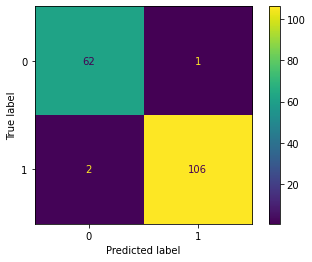

In [ ]:
from sklearn.metrics import plot_confusion_matrix
display = plot_confusion_matrix(clf,X_test,y_test)
plt.show()

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 62,   1],
       [  2, 106]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9824561403508771


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(precision)

0.9906542056074766


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(recall)

0.9814814814814815


In [ ]:
from sklearn.metrics import f1_score 
f1_score = f1_score(y_test, y_pred)
print(f1_score)

0.986046511627907
